In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
df_dic = pd.read_excel('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/합본.xlsx')
print(df_dic[:100])

     단어    클래스
0    일본  항일+민족
1    민족  항일+민족
2    조선  항일+민족
3    독립  항일+민족
4    사람  항일+민족
..  ...    ...
95  러시아  항일+민족
96   국가  항일+민족
97   문명  항일+민족
98   학교  항일+민족
99   인민  항일+민족

[100 rows x 2 columns]


In [4]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['일본/NNP', '민족/NNG', '조선/NNP', '독립/NNG', '사람/NNG', '세계/NNG', '나라/NNG', '일/NNG', '동포/NNG', '말/NNG']
{'비폭력(비무장)+평화', '국제주의+세계적', '공화정 국가 수립 + 개혁적', '폭력(무장)', '항일+민족'}


In [5]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

     단어    클래스     품사태깅
0    일본  항일+민족   일본/NNP
1    민족  항일+민족   민족/NNG
2    조선  항일+민족   조선/NNP
3    독립  항일+민족   독립/NNG
4    사람  항일+민족   사람/NNG
..  ...    ...      ...
95  러시아  항일+민족  러시아/NNP
96   국가  항일+민족   국가/NNG
97   문명  항일+민족   문명/NNG
98   학교  항일+민족   학교/NNG
99   인민  항일+민족   인민/NNG

[100 rows x 3 columns]
['비폭력(비무장)+평화', '국제주의+세계적', '공화정 국가 수립 + 개혁적', '폭력(무장)', '항일+민족']


In [6]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

비폭력(비무장)+평화
['간부/NNG', '부총장/NNG', '총애/NNG', '총리/NNG', '휴학/NNG', '연설회/NNG', '부합/NNG', '대한국민의회/NNP', '주교/NNG', '국경/NNG', '염치/NNG', '최/NNP', '주소/NNG', '분별/NNG', '일본사회당/NNP', '보답/NNG', '예배/NNG', '예법/NNG', '번창/NNG', '구/NNG', '번영/NNG', '번성/NNG', '전북/NNP', '꾀/NNG', '교환/NNG', '교토/NNP', '추/VV', '전신/NNG', '존망/NNG', '존경/NNG', '굴욕/NNG', '임용/NNG', '폭도/NNG', '약탈/NNG']
국제주의+세계적
['지/EC', '출병/NNG', '이탈리아/NNP', '배포/NNG', '약소민족/NNG', '배신/NNG', '조화/NNG', '계승/NNG', '중간/NNG', '꼴/NNG', '전부/MAG', '추밀부/NNG', '종족/NNG', '한미/NNP', '비준/NNG', '인사/NNG', '병신/NNG', '언급/NNG', '인명/NNG', '간파/NNG', '빙자/NNG', '구석/NNG', '예정/NNG', '변천/NNG', '결의문/NNG', '대수/NNG', '전반/NNG', '벽력/NNG', '경탄/NNG', '편집인/NNG', '준수/NNG', '인격/NNG', '사망자/NNG', '일행/NNG', '경향/NNG', '법규/NNG', '함양/NNG', '연출/NNG', '파리/NNP', '신세계/NNP', '소멸/NNG', '남대문/NNP', '회의장/NNG', '소생/NNG', '신자/NNG', '기약/NNG', '모집/NNG', '모자/NNG', '지식인/NNG', '장악/NNG', '농부/NNG', '급박/NNG', '의정원/NNG', '공적/NNG', '징계/NNG', '모래/NNG', '의의/NNG', '유산/NNG', '태국/NNP', '노소/NNG', '회의소/NNG', '몰지각/NNG', '

In [7]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'일본/NNP': '항일+민족', '민족/NNG': '항일+민족', '조선/NNP': '항일+민족', '독립/NNG': '항일+민족', '사람/NNG': '항일+민족', '세계/NNG': '항일+민족', '나라/NNG': '항일+민족', '일/NNG': '항일+민족', '동포/NNG': '항일+민족', '말/NNG': '항일+민족', '자유/NNG': '항일+민족', '일본인/NNG': '항일+민족', '평화/NNG': '항일+민족', '하늘/NNG': '항일+민족', '정부/NNG': '항일+민족', '마음/NNG': '항일+민족', '조선인/NNG': '항일+민족', '행동/NNG': '항일+민족', '국민/NNG': '항일+민족', '생각/NNG': '항일+민족', '한국/NNP': '항일+민족', '정의/NNG': '항일+민족', '때/NNG': '항일+민족', '가운데/NNG': '항일+민족', '만세/IC': '항일+민족', '피/NNG': '항일+민족', '회의/NNG': '항일+민족', '아래/NNG': '항일+민족', '역사/NNG': '항일+민족', '백성/NNG': '항일+민족', '동안/NNG': '항일+민족', '자신/NNG': '항일+민족', '정신/NNG': '항일+민족', '운동/NNG': '항일+민족', '앞/NNG': '항일+민족', '소리/NNG': '항일+민족', '미국/NNP': '항일+민족', '나/NP': '항일+민족', '원수/NNG': '항일+민족', '대표/NNG': '항일+민족', '시대/NNG': '항일+민족', '이번/NNG': '항일+민족', '과거/NNG': '항일+민족', '생명/NNG': '항일+민족', '이상/NNG': '항일+민족', '세상/NNG': '항일+민족', '전쟁/NNG': '항일+민족', '동양/NNG': '항일+민족', '선언/NNG': '항일+민족', '후/IC': '항일+민족', '힘/NNG': '항일+민족', '뜻/NNG': '항일+민족', '속/NNG': '항일+민족', '형

In [8]:
# 데이터 불러오기
import re

fileDir = "C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/text/진관사 & 독립신문.txt"
fr = open(fileDir, 'r', encoding='utf-8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

신대한 제 호 월 일
창간사
오늘은 본보가 창간되는 첫 번째 날이다 간단히 본보의 출현 경위에 대해서 국내외 독자 동포들께 알리고자 한다
어느 나라의 혁명이든지 반드시 그 사상을 고취하는 언론이 선도하였다 하지만 우리나라에서는 신문 잡지라는 이름을 알게 되자마자 이민족의 전제 정치의 된서리를 맞아 전국 삼천리 안에서 조선의 글로 간행되는 신문이라고는 일본 총독부의 기관지인 매일신보 이외에는 그림자도 찾아볼 수 없게 되었다 언론계가 발달할 시간이 어디 있었겠는가
이번 독립운동도 안으로는 역사의 위엄 있는 혼령에 의지하고 밖으로는 세계의 사조에 호응하여 순결한 민족의 자격에서 비롯된 사건이었다 누가 선동하거나 누구의 도움을 받아서 일어난 것이 아니다 따라서 우리 민족의 독립을 향한 각오는 더더욱 자랑할 만하다고 할 수 있다
독립 선언 이후에는 모든 벙어리들이 한꺼번에 입을 열게 되었다 한성 한 모퉁이에서만 해도 엄밀한 경찰의 봉쇄망을 뚫고 발행된 신문이 모두 여 종이나 된다고 한다 해외 각지에서도 한인이 살고 있는 곳이라면 반드시 한두 개의 출판물이 발행되고 있다 이 신문들은 체제의 정밀함과 기사의 상세함에서는 서로 다르지만 원수를 물리쳐 나라를 회복하고자 하는 애타는 마음은 모두 다 같다
비록 여태까지 지하실이나 석굴에서 비결서를 지어서 혁명을 예언하지는 못하였지만 지금 같은 업계의 일원이 되어 독립을 부르짖고 원수들을 꾸짖으며 내외 사정을 보도하여 조금이나마 사업에 도움이 될까 바라는 마음에서 본보가 출현하게 되었다
세계의 기록은 거의 대부분 전쟁의 기록이다 전쟁은 크게 두 가지 종류의 전쟁으로 나눌 수 있다 그 하나는 민족 전쟁이고 다른 하나는 계급 전쟁이다 먼저 민족 전쟁을 살펴보면 동서양의 정치사를 가득 채운 전쟁들이 대부분 여기에 속한다 다음으로 계급 전쟁을 살펴보면 서양의 상고 시대로부터 귀족 승려 무사 농민 등 각 계급이 대치하다가 시대가 흐름에 따라 점차 도태되고 근세에 와서는 귀족과 평민 사이의 전쟁이 되었으며 최근에 와서는 노동자와 자본가 두 

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\wjh20\AppData\Local\Temp\ipykernel_60340\1723306020.py:12: SyntaxWarning: invalid escape sequence '\s'
  content = re.sub('[\s]+', ' ', content).strip()


In [9]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""

MWEsList = open('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/복합어 사전.txt', encoding='UTF-8').readlines()

for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        for i in range(0,len(MWEsList)):
            eachMWEs = MWEsList[i].replace("\n","").strip()
            content = content.replace(eachMWEs, eachMWEs.replace(" ","_"))
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "NN" in eachOut[1] :
                if "_" in eachOut[0]:
                    resultContent = eachOut[0]+"/MWEs"
                else:
                    resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
            if "_" in eachOut[0]:
                result = eachOut[0] + "/MWEs"
            else:
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['신대/NNG', '호/NNB', '월/NNG', '일/NNG', '창간사/NNG', '오늘/NNG', '본보/NNG', '창간/NNG', '번/NNB', '날/NNG', '본보/NNG', '출현/NNG', '경위/NNG', '국내외/NNG', '독자/NNG', '동포/NNG', '나라/NNG', '혁명/NNG', '사상/NNG', '고취/NNG']
['신대/NNG', '하/XSA', 'ᆫ/ETM', '제/MM', '호/NNB', '월/NNG', '일/NNG', '창간사/NNG', '오늘/NNG', '은/JX', '본보/NNG', '가/JKS', '창간/NNG', '되/XSV', '는/ETM', '첫/MM', '번/NNB', '째/XSN', '날/NNG', '이/JKS']
{'여전히/MAG', '살아남/VV', '남산/NNP', '토론/NNG', '백/NR', '이/JKC', '갓/NNG', '아니면/MAJ', '길흉/NNG', '주/VX', '가장/MAG', '경찰관/NNG', '도록/EC', '자멸/NNG', '마땅히/MAG', '부여/NNP', '되돌아보/VV', '강도/NNG', '군중/NNG', '세세년/NNG', '자기/NNG', '우선/MAG', '보/VX', '연주/NNP', '민족/NNG', '인원/NNG', '라/EF', '되/VV', '은가/EC', '겨를/NNB', '자칭/NNG', '경제/NNG', '꼬리/NNG', '국무총리/NNG', '후/NNG', '활발히/MAG', '세우/VV', '적국/NNG', '단절/NNG', '을/ETM', '며/EC', '문명/NNG', '는다/EC', '완고/XR', '업계/NNG', '영구/NNG', '단축/NNG', '등극/NNG', '민심/NNG', '살/VV', '또한/MAJ', '내/VV', '원년/NNG', '붙이/VV', '데/NNB', '이승만/NNP', '연합회/NNG', '무사/NNG', '의견/NNG', '걸치/VV', '회사/NNG', '곤괘/NNP', '어서/MAG', '석굴/

<Axes: xlabel='n', ylabel='word'>

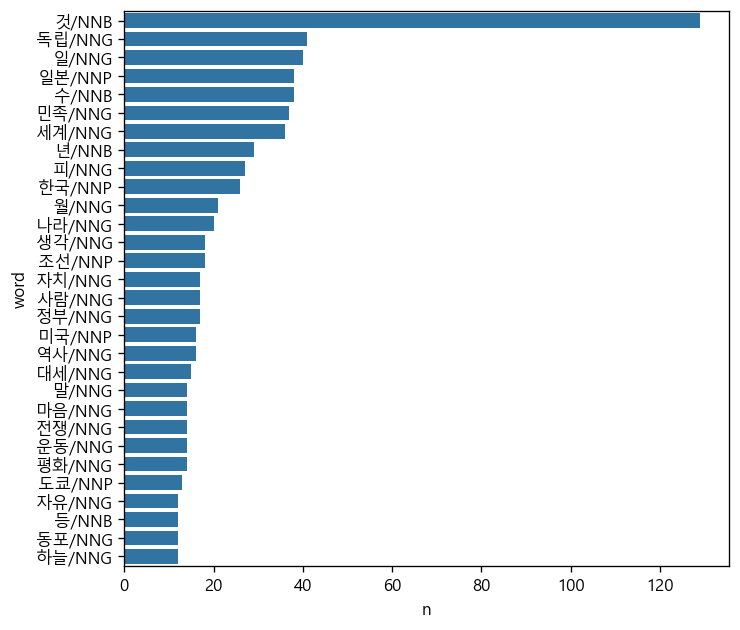

In [10]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

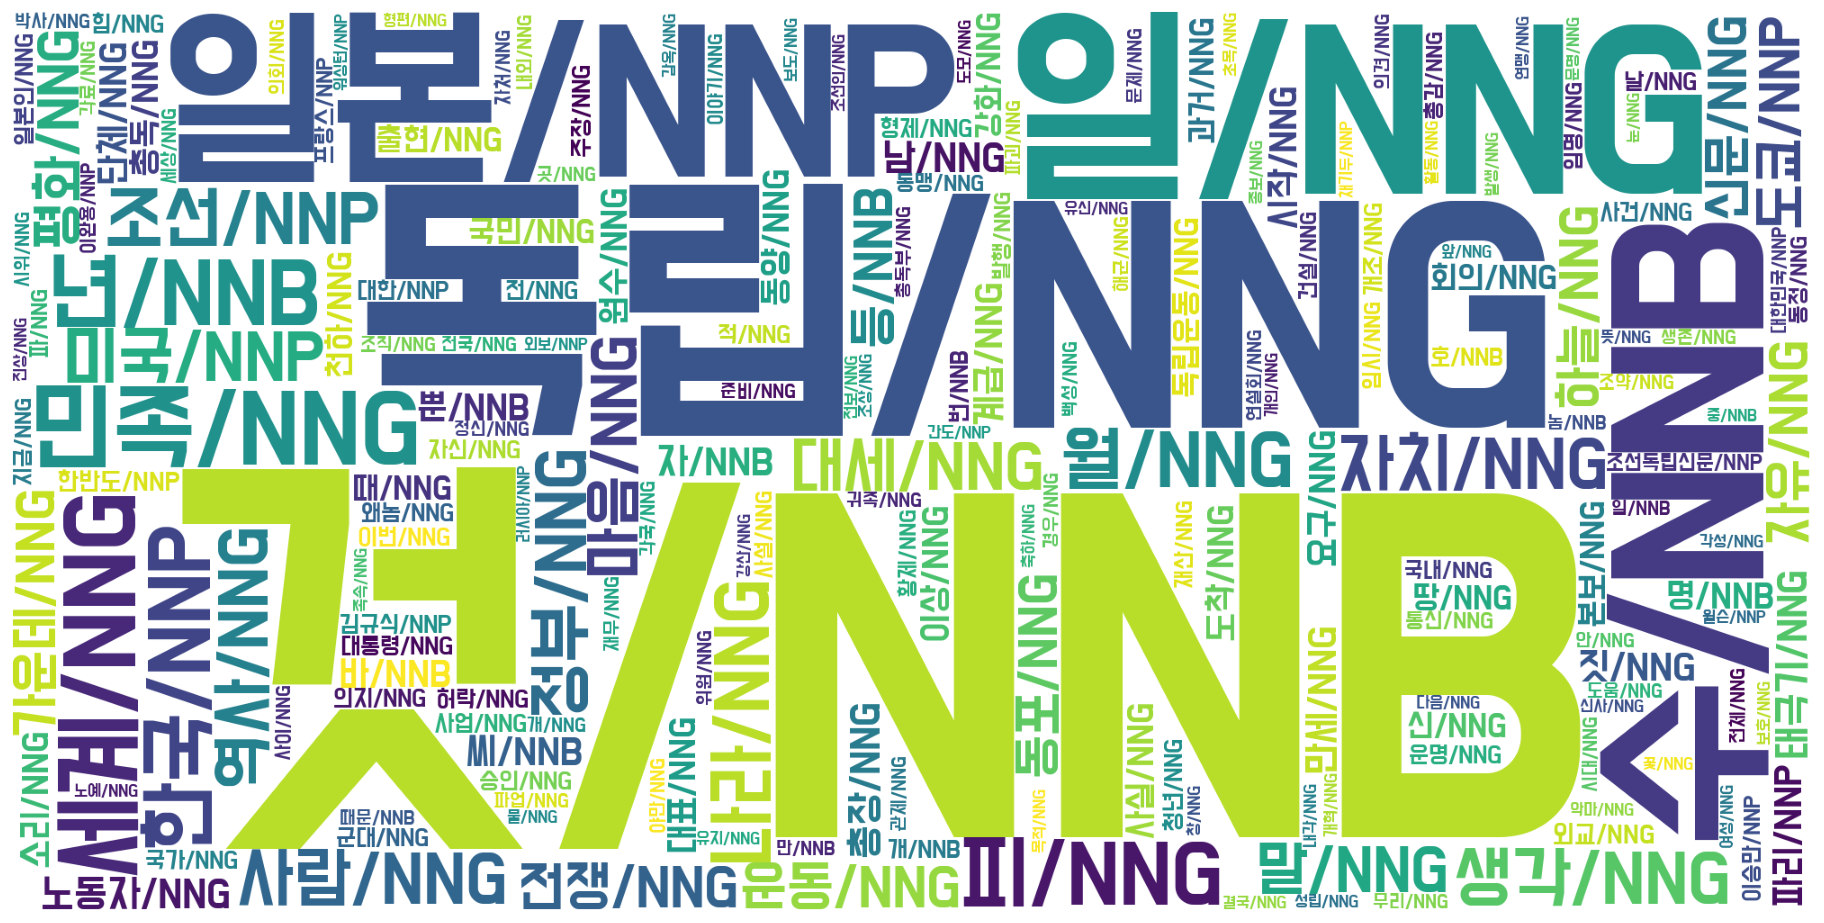

In [11]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = 'C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

                   0    1    2    3    4    5    6    7    8    9  ...  375  \
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                 376  377  378  379  380  381  382  383  384  
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 385 columns]


C:\Users\wjh20\AppData\Local\Temp\ipykernel_60340\3595135074.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0


                   0    1    2    3     4    5     6    7    8    9  ...  375  \
비폭력(비무장)+평화      0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
국제주의+세계적         1.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  1.0  0.0  ...  0.0   
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
폭력(무장)           0.0  0.0  0.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
항일+민족            1.0  0.0  4.0  5.0  16.0  2.0  14.0  1.0  3.0  4.0  ...  3.0   

                  376  377   378   379  380  381  382  383  384  
비폭력(비무장)+평화       0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  
국제주의+세계적          1.0  0.0   1.0   1.0  1.0  0.0  0.0  0.0  0.0  
공화정 국가 수립 + 개혁적   0.0  1.0   0.0   1.0  0.0  0.0  0.0  0.0  0.0  
폭력(무장)            0.0  0.0   0.0   0.0  1.0  0.0  0.0  0.0  0.0  
항일+민족            11.0  6.0  10.0  11.0  8.0  2.0  2.0  0.0  1.0  

[5 rows x 385 columns]


In [13]:
import pandas as pd
from math import log

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

In [14]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\wjh20\AppData\Local\Temp\ipykernel_60340\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


                        0    1         2         3         4         5  \
비폭력(비무장)+평화      0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
국제주의+세계적         0.871839  0.0  0.000000  0.000000  0.000000  0.000000   
공화정 국가 수립 + 개혁적  0.000000  0.0  0.000000  0.000000  2.734368  0.000000   
폭력(무장)           0.000000  0.0  0.000000  0.000000  2.146581  0.000000   
항일+민족            0.112602  0.0  0.450407  0.563008  1.801627  0.225203   

                        6         7         8         9  ...       375  \
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
국제주의+세계적         0.000000  0.000000  0.871839  0.000000  ...  0.000000   
공화정 국가 수립 + 개혁적  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
폭력(무장)           0.000000  0.000000  0.000000  0.000000  ...  0.000000   
항일+민족            1.576423  0.112602  0.337805  0.450407  ...  0.337805   

                      376       377       378       379       380       381  \
비폭력(비무장)+평화      0.000000  0.00

In [15]:
corpus_tfidf_out.to_csv("C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/output/진관사 & 독립신문.csv")

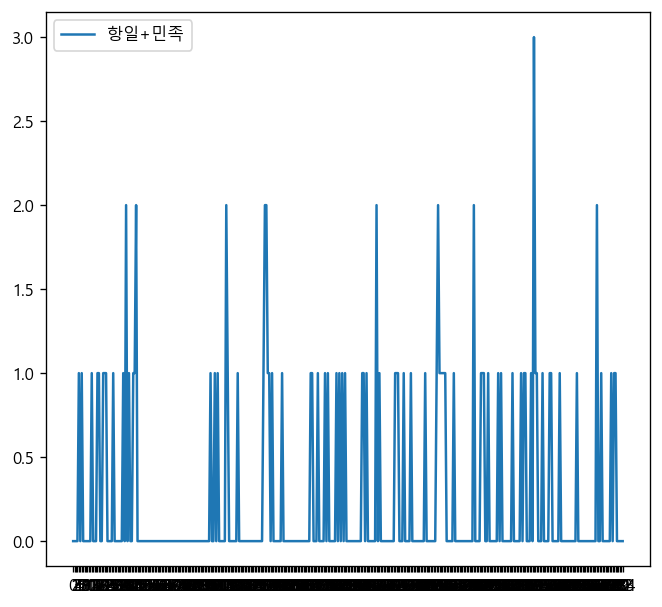

In [16]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['항일+민족']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '항일+민족')
plt.legend()
plt.show()

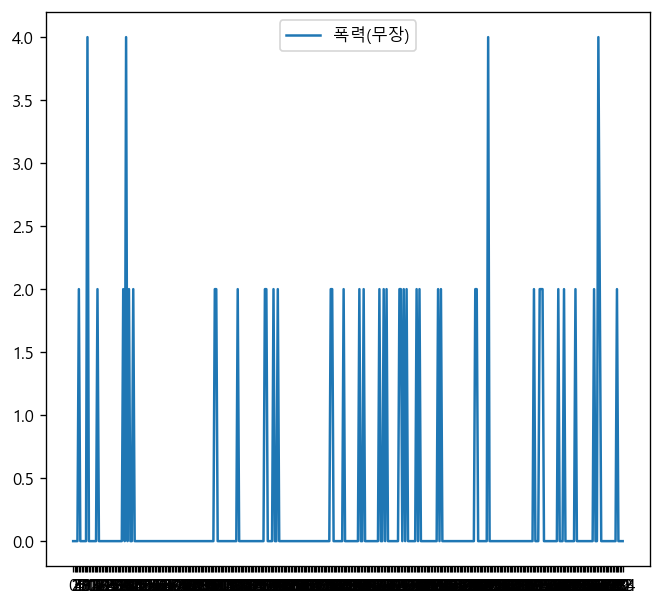

In [17]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['폭력(무장)']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '폭력(무장)')
plt.legend()
plt.show()

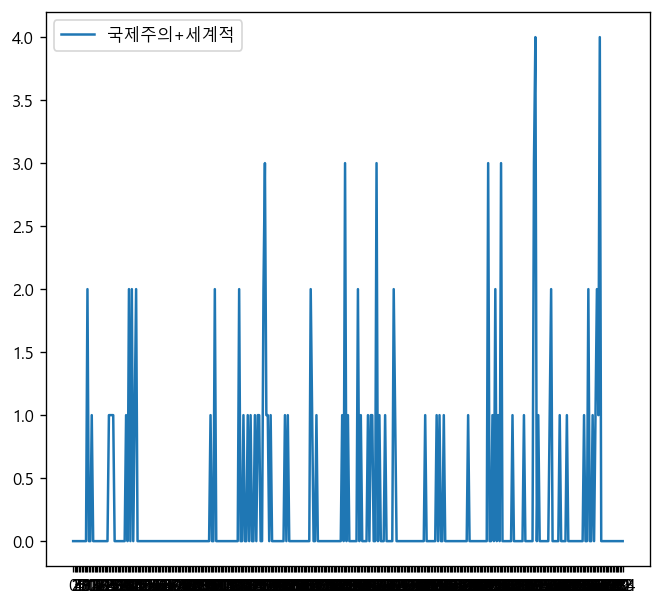

In [18]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['국제주의+세계적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '국제주의+세계적')
plt.legend()
plt.show()

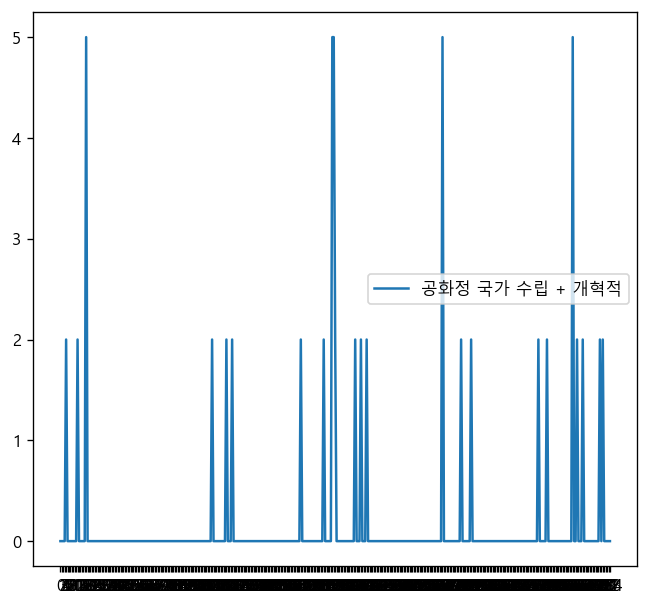

In [19]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['공화정 국가 수립 + 개혁적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '공화정 국가 수립 + 개혁적')
plt.legend()
plt.show()

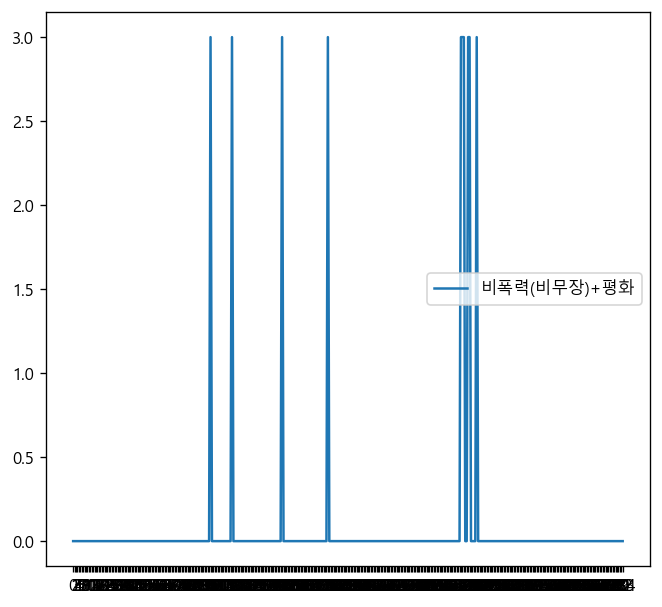

In [20]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['비폭력(비무장)+평화']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '비폭력(비무장)+평화')
plt.legend()
plt.show()

<Axes: xlabel='words', ylabel='freq'>

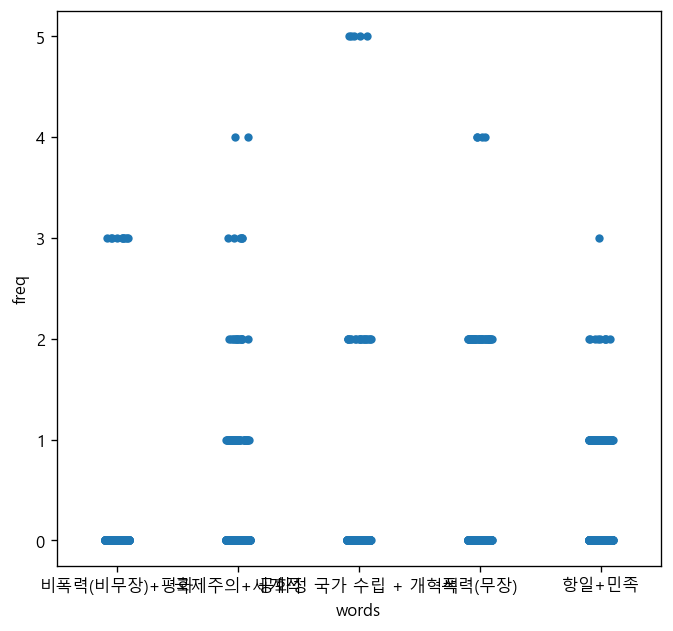

In [21]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF

inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

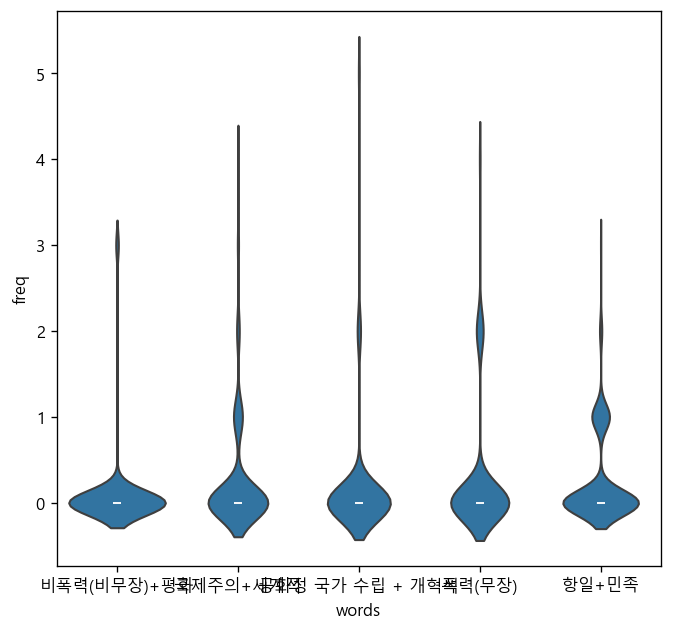

In [22]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

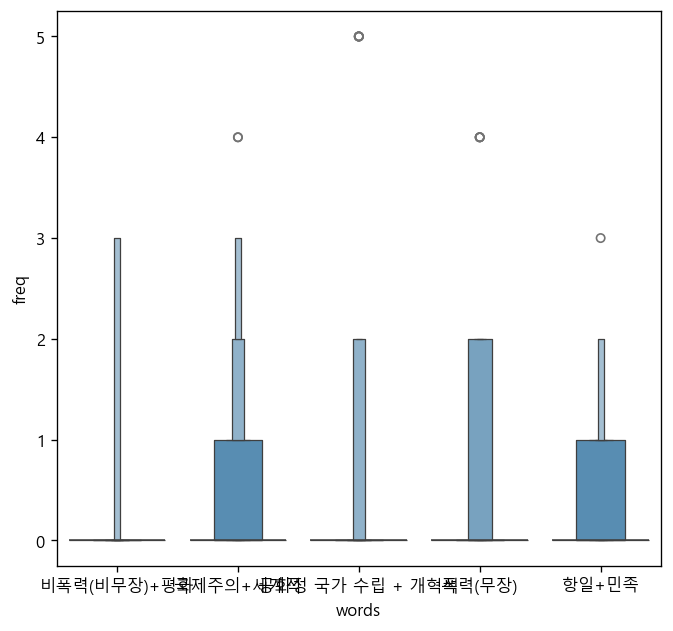

In [23]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)